In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

***EJERCICIO UNO***

In [175]:
# Crear dataset sintético
np.random.seed(43)
experiencia = np.random.randint(0, 31, 100)
salario = 15000 + 2000 * experiencia + np.random.normal(0, 5000, 100)

data = pd.DataFrame({'Años_experiencia': experiencia, 'Salario': salario})
print(f"Datos: \n{data.head()}\n")


Datos: 
   Años_experiencia       Salario
0                 4  29784.942141
1                 0  17577.037203
2                17  54102.991379
3                21  47043.457569
4                26  66564.215207



In [176]:
# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data[['Años_experiencia']], data['Salario'])



LinearRegression()

Salario predicho para 5 años de experiencia: $25581.54 al año


d:\Matias\py\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


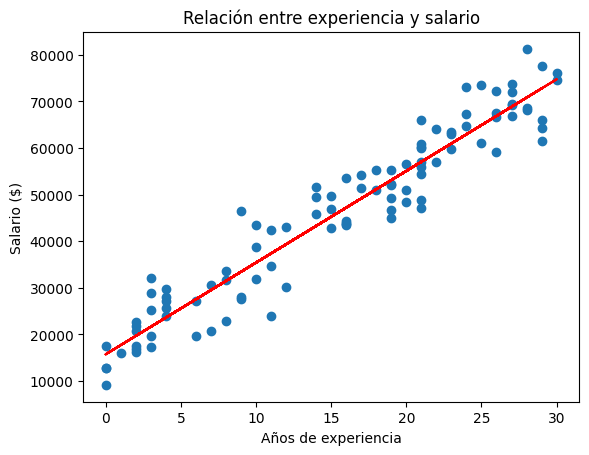

In [177]:
# Predicción para 5 años de experiencia
salario_pred = model.predict([[5]])
print(f"Salario predicho para 5 años de experiencia: ${salario_pred[0]:.2f} al año")

# Gráfico
plt.scatter(data['Años_experiencia'], data['Salario'])
plt.plot(data['Años_experiencia'], model.predict(data[['Años_experiencia']]), color='red')
plt.title('Relación entre experiencia y salario')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario ($)')
plt.show()

***EJERCICIO DOS***

In [178]:
# Dataset sintético
np.random.seed(42)
kilometraje = np.random.uniform(5, 200, 300)
antiguedad = np.random.uniform(1, 15, 300)
puertas = np.random.choice([2, 4], 300)
precio = 25000 - 90*kilometraje - 1000*antiguedad + 800*puertas + np.random.normal(0, 3000, 300)

autos = pd.DataFrame({
    'Kilometraje': kilometraje,
    'Antiguedad': antiguedad,
    'Puertas': puertas,
    'Precio': precio
})

print(f"\nDatos:\n {autos.head()}\n")


Datos:
    Kilometraje  Antiguedad  Puertas        Precio
0    78.035323    1.723544        2  13417.518081
1   190.389290    8.438965        4   6057.261210
2   147.738819    8.568892        4   7350.103841
3   121.738404    9.924019        4   6073.661240
4    35.423635   11.165279        2  14144.939786



In [179]:
# Modelo de regresión lineal múltiple
X = autos[['Kilometraje', 'Antiguedad', 'Puertas']]
y = autos['Precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [180]:
print(f"R² en entrenamiento: {model.score(X_train, y_train):.3f}")
print(f"R² en prueba: {model.score(X_test, y_test):.3f}")

R² en entrenamiento: 0.828
R² en prueba: 0.764


In [181]:
# Coeficientes
print("\nCoeficientes del modelo:")
print(f"- Intercepto: ${model.intercept_:.2f}")
print(f"- Kilometraje: -${abs(model.coef_[0]):.2f} por cada 1,000 km")
print(f"- Antigüedad: -${abs(model.coef_[1]):.2f} por año")
print(f"- Puertas: ${model.coef_[2]:.2f} por puerta adicional")

# Predicción ejemplo
kl = 1
age = 5
doors = 4
auto_ejemplo = pd.DataFrame([[kl, age, doors]], columns=['Kilometraje', 'Antiguedad', 'Puertas'])
precio_pred = model.predict(auto_ejemplo)
print(f"\nPrecio estimado para auto con {kl},000 km, {age} años y {doors} puertas: ${precio_pred[0]:.2f}")


Coeficientes del modelo:
- Intercepto: $25272.30
- Kilometraje: -$92.57 por cada 1,000 km
- Antigüedad: -$954.09 por año
- Puertas: $737.44 por puerta adicional

Precio estimado para auto con 1,000 km, 5 años y 4 puertas: $23359.03


***EJERCICIO TRES***

In [182]:
# Dataset sintético
np.random.seed(42)
temp = np.random.uniform(10, 35, 200)
habitantes = np.random.randint(1, 6, 200)
electrodomesticos = np.random.randint(3, 15, 200)
consumo = 120 + 4.5*temp + 45*habitantes + 25*electrodomesticos + np.random.normal(0, 30, 200)

electricidad = pd.DataFrame({
    'Temperatura': temp,
    'Habitantes': habitantes,
    'Electrodomesticos': electrodomesticos,
    'Consumo_kWh': consumo
})

print(f"\nDatos: \n {electricidad.head()}\n")


Datos: 
    Temperatura  Habitantes  Electrodomesticos  Consumo_kWh
0    19.363503           4                  3   472.388443
1    33.767858           3                 10   713.240485
2    28.299849           1                 12   620.862034
3    24.966462           4                 13   720.041970
4    13.900466           4                 14   685.599657



In [183]:
# Modelo de regresión lineal múltiple
X = electricidad[['Temperatura', 'Habitantes', 'Electrodomesticos']]
y = electricidad['Consumo_kWh']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [184]:
# Resultados
print("Modelo de predicción de consumo eléctrico:")
print(f"Intercepto: {model.intercept_:.2f} kWh")
print("\nCoeficientes:")
print(f"- Temperatura: {model.coef_[0]:.2f} kWh por °C")
print(f"- Habitantes: {model.coef_[1]:.2f} kWh por persona")
print(f"- Electrodomésticos: {model.coef_[2]:.2f} kWh por aparato")

# Predicción ejemplo
casa_ejemplo = pd.DataFrame([[22, 3, 8]], columns=['Temperatura', 'Habitantes', 'Electrodomesticos'])
consumo_pred = model.predict(casa_ejemplo)
print(f"\nConsumo estimado para casa con:")
print(f"- 22°C promedio")
print(f"- 3 habitantes")
print(f"- 8 electrodomésticos")
print(f"Consumo estimado: {consumo_pred[0]:.2f} kWh")

Modelo de predicción de consumo eléctrico:
Intercepto: 111.59 kWh

Coeficientes:
- Temperatura: 5.07 kWh por °C
- Habitantes: 44.63 kWh por persona
- Electrodomésticos: 24.45 kWh por aparato

Consumo estimado para casa con:
- 22°C promedio
- 3 habitantes
- 8 electrodomésticos
Consumo estimado: 552.70 kWh


***EJERCICIO CUATRO***

In [185]:
# Dataset sintético
np.random.seed(42)
horas_entreno = np.random.uniform(5, 25, 150)
consumo_calorico = np.random.uniform(2000, 4000, 150)
edad = np.random.randint(18, 50, 150)
tiempo_5k = 22 - 0.4*horas_entreno + 0.0015*consumo_calorico + 0.07*edad + np.random.normal(0, 1.5, 150)

rendimiento = pd.DataFrame({
    'Horas_entrenamiento': horas_entreno,
    'Consumo_calorico': consumo_calorico,
    'Edad': edad,
    'Tiempo_5k': tiempo_5k
})

In [186]:
# Modelo de regresión lineal múltiple
X = rendimiento[['Horas_entrenamiento', 'Consumo_calorico', 'Edad']]
y = rendimiento['Tiempo_5k']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [187]:
# Resultados
print("Modelo de predicción de tiempo en 5K:")
print(f"Intercepto: {model.intercept_:.2f} minutos (tiempo base)")
print("\nCoeficientes:")
print(f"- Horas entrenamiento: {model.coef_[0]:.2f} minutos por hora adicional")
print(f"- Consumo calórico: {model.coef_[1]:.4f} minutos por caloría adicional")
print(f"- Edad: {model.coef_[2]:.2f} minutos por año")

# Predicción ejemplo
atleta_ejemplo = pd.DataFrame([[12, 2800, 30]], columns=['Horas_entrenamiento', 'Consumo_calorico', 'Edad'])
tiempo_pred = model.predict(atleta_ejemplo)
print(f"\nTiempo estimado para atleta con:")
print(f"- 12 horas/semana de entrenamiento")
print(f"- 2800 calorías/día")
print(f"- 30 años de edad")
print(f"Tiempo estimado en 5K: {tiempo_pred[0]:.1f} minutos")

Modelo de predicción de tiempo en 5K:
Intercepto: 21.02 minutos (tiempo base)

Coeficientes:
- Horas entrenamiento: -0.39 minutos por hora adicional
- Consumo calórico: 0.0017 minutos por caloría adicional
- Edad: 0.08 minutos por año

Tiempo estimado para atleta con:
- 12 horas/semana de entrenamiento
- 2800 calorías/día
- 30 años de edad
Tiempo estimado en 5K: 23.6 minutos


***EJERCICIO CINCO***

In [188]:
# Dataset sintético
np.random.seed(42)
horas_estudio = np.random.uniform(0, 40, 100)
puntaje = 30 + 2.2*horas_estudio + np.random.normal(0, 8, 100)
puntaje = np.clip(puntaje, 0, 100)  # Asegurar puntajes entre 0 y 100

examen = pd.DataFrame({
    'Horas_estudio': horas_estudio,
    'Puntaje': puntaje
})



In [189]:
# Modelo de regresión lineal simple
X = examen[['Horas_estudio']]
y = examen['Puntaje']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)



LinearRegression()

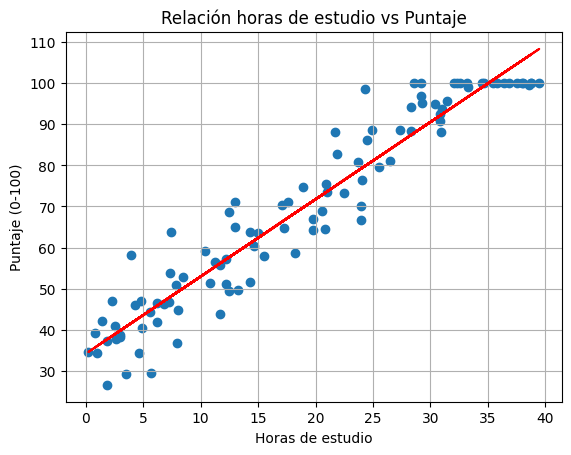

In [190]:
# Visualización
plt.scatter(examen['Horas_estudio'], examen['Puntaje'])
plt.plot(examen['Horas_estudio'], model.predict(X), color='red')
plt.title('Relación horas de estudio vs Puntaje')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntaje (0-100)')
plt.grid(True)
plt.show()

In [191]:
# Resultados
print("Modelo de predicción de puntaje:")
print(f"Intercepto: {model.intercept_:.2f} (puntaje sin estudiar)")
print(f"Coeficiente: {model.coef_[0]:.2f} puntos por hora de estudio")

# Predicción ejemplo
print("\nPredicciones:")
for horas in [5, 10, 15, 20, 25, 30]:
    pred = model.predict([[horas]])
    print(f"- {horas} horas: {pred[0]:.1f}/100")

# Máximo teórico (usando el modelo lineal)
max_horas = 40
max_puntaje = model.predict([[max_horas]])[0]
print(f"\nSegún el modelo, estudiando {max_horas} horas se alcanzaría {max_puntaje:.1f} puntos")

Modelo de predicción de puntaje:
Intercepto: 34.22 (puntaje sin estudiar)
Coeficiente: 1.88 puntos por hora de estudio

Predicciones:
- 5 horas: 43.6/100
- 10 horas: 53.0/100
- 15 horas: 62.4/100
- 20 horas: 71.8/100
- 25 horas: 81.1/100
- 30 horas: 90.5/100

Según el modelo, estudiando 40 horas se alcanzaría 109.3 puntos


d:\Matias\py\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Matias\py\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Matias\py\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Matias\py\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Matias\py\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Matias\py\mi_entorno\lib\si